# Logistic Map (symbolic)

In [1]:
import sympy
from sympy import *
x, L = symbols('x L', positive=True, real=True)
from ipywidgets import interact, interactive, fixed, interact_manual
import ipywidgets as widgets
from sympy.plotting import plot3d

In [2]:
# define the logistics map function
LMap = Lambda(x, L*x*(1-x))

In [3]:
# single iteration fixpoint
FP1 = solve(LMap(x)-x,x)[0]
FP1

(L - 1)/L

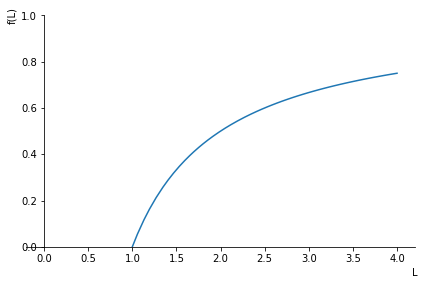

In [4]:
plot(FP1, (L, 0, 4), ylim=(0,1))

In [5]:
# double iteration fixpoint
FP2 = solve(LMap(LMap(x))-x,x)
FP2

[(L - 1)/L,
 (L - sqrt(L - 3)*sqrt(L + 1) + 1)/(2*L),
 (L + sqrt(L - 3)*sqrt(L + 1) + 1)/(2*L)]

In [6]:
FP2[1]

(L - sqrt(L - 3)*sqrt(L + 1) + 1)/(2*L)

In [7]:
FP2[2]

(L + sqrt(L - 3)*sqrt(L + 1) + 1)/(2*L)

<string>:1: RuntimeWarning: divide by zero encountered in cdouble_scalars
<string>:1: RuntimeWarning: divide by zero encountered in cdouble_scalars


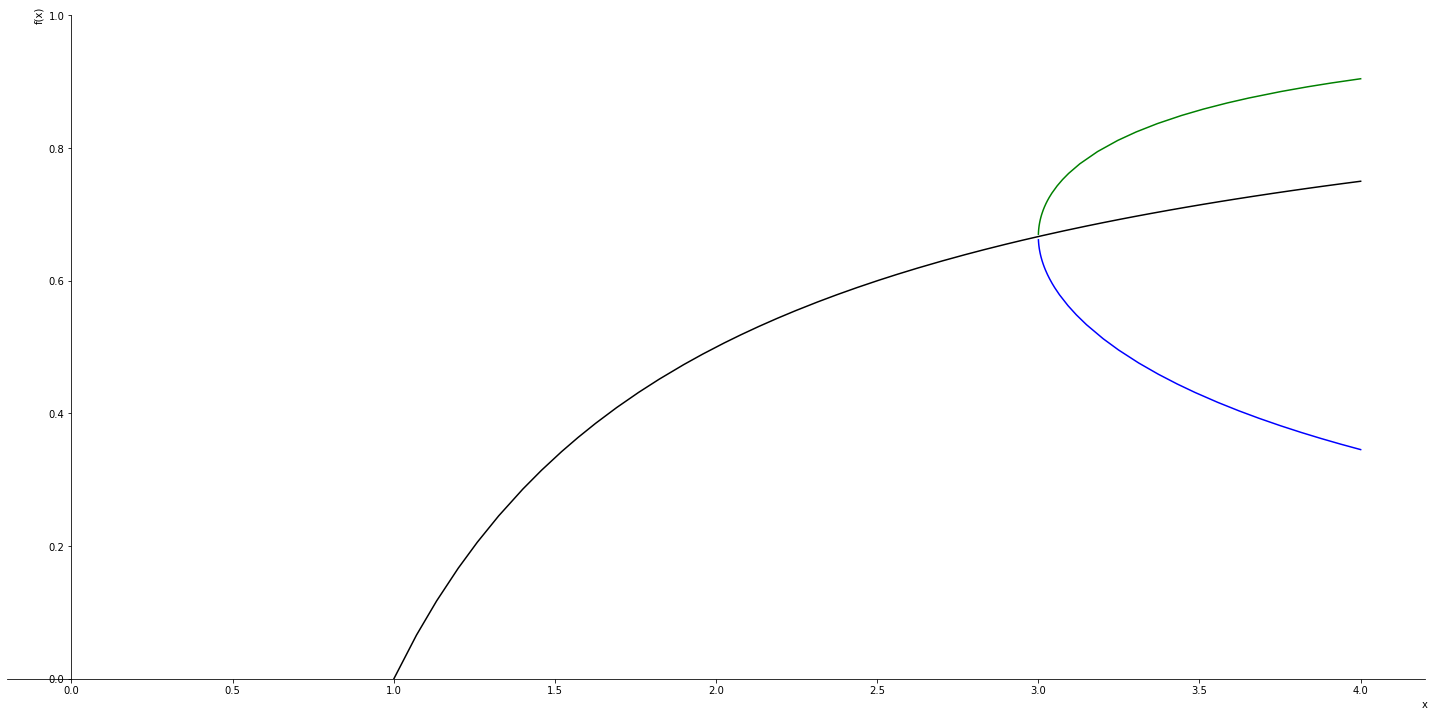

In [8]:
# Draw fix points of period 1 and 2
p = plot( 
    (FP2[0], (L, 0, 4)), 
    (FP2[1], (L, 0, 4)),
    (FP2[2], (L, 0, 4)), 
    ylim=(0,1), size=(20,10), show=False
)
p[0].line_color='black'
p[1].line_color='blue'
p[2].line_color='green'
p.show()

In [9]:
# define mapping function with N iterations
def LMapN( N, x ):
    if N == 1: return LMap(x) 
    elif N > 1: return LMap(LMapN( N-1, x))

In [10]:
# Plot various iterations starting from x = Seed
@interact(Seed=(0.0, 1.0, 0.02), LowL=(0.0, 4.0, 0.05), HighL=(0.0, 4.0, 0.05), continuous_update=False)
def PlotIterations(Seed, LowL=0.0, HighL=4.0):
    p = plot( 
      ( FP2[0], (L, LowL, HighL) ), 
      ( FP2[1], (L, LowL, HighL) ),
      ( FP2[2], (L, LowL, HighL) ), 
      ( LMapN(1,Seed), (L, LowL, HighL) ),
      ( LMapN(2,Seed), (L, LowL, HighL) ),
      ( LMapN(3,Seed), (L, LowL, HighL) ),
      ( LMapN(4,Seed), (L, LowL, HighL) ),
      ( LMapN(5,Seed), (L, LowL, HighL) ),
      ( LMapN(6,Seed), (L, LowL, HighL) ),
      ( LMapN(7,Seed), (L, LowL, HighL) ),
      ( LMapN(8,Seed), (L, LowL, HighL) ),
     xlabel='L', ylabel='Iterated Seed', ylim=(0,1), xscale='linear', 
     size=(20,10), show=False
    )
    p[0].line_color='black'
    p[1].line_color='blue'
    p[2].line_color='green'
    p.show()

interactive(children=(FloatSlider(value=0.5, description='Seed', max=1.0, step=0.02), FloatSlider(value=0.0, d…

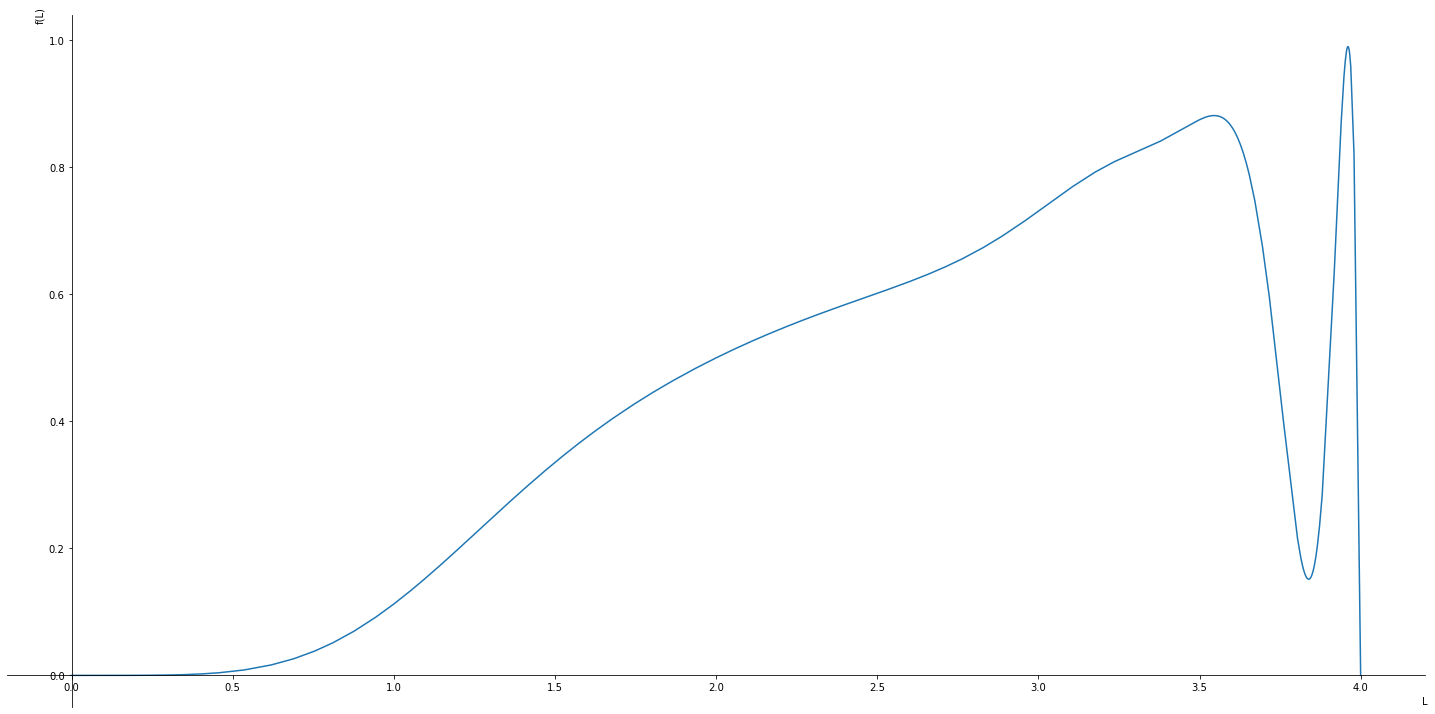

In [11]:
plot( LMapN(5, 0.5), (L,0,4), size=(20,10), show=True)

In [12]:
# Plot the iterated mapping function, add widget to select L
@interact(L_Value=(0.0, 4.0, 0.01), continuous_update=False)
def PlotIteradedMap(L_Value):
    plot( 
        (lambdify(x, LMapN(1, x).subs(L,L_Value) )(x), (x,0,1) ), 
        (lambdify(x, LMapN(2, x).subs(L,L_Value) )(x), (x,0,1) ), 
        (lambdify(x, LMapN(3, x).subs(L,L_Value) )(x), (x,0,1) ), 
        (lambdify(x, LMapN(4, x).subs(L,L_Value) )(x), (x,0,1) ), 
        (lambdify(x, LMapN(5, x).subs(L,L_Value) )(x), (x,0,1) ), 
        (lambdify(x, LMapN(6, x).subs(L,L_Value) )(x), (x,0,1) ), 
        (lambdify(x, LMapN(7, x).subs(L,L_Value) )(x), (x,0,1) ), 
        (lambdify(x, LMapN(8, x).subs(L,L_Value) )(x), (x,0,1) ), 
        (lambdify(x, x)(x), (x,0,1) ), 
        size=(20,10), show=True)

interactive(children=(FloatSlider(value=2.0, description='L_Value', max=4.0, step=0.01), Output()), _dom_class…

In [13]:
# 3D plot of iterated map
@interact(Iterations=(1, 10), continuous_update=False)
def Plot3dIteratedMap(Iterations):
    plot3d( 
        LMapN(Iterations, x), (L,0,4), (x,0,1),
        nb_of_points_x = 50, nb_of_points_y = 500,
        size=(20,10), show=True
    )

interactive(children=(IntSlider(value=5, description='Iterations', max=10, min=1), Output()), _dom_classes=('w…